In [165]:

import pandas as pd 
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="bigdatafinalproject-332802-3d5e0d6e4c0e.json"


# Imports

In [168]:
from google.cloud import bigquery

client = bigquery.Client(project='bigdatafinalproject-332802')


# Reading csv files

In [112]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('./BX-CSV-Dump/BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False, skiprows =1)



In [ ]:
#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('./BX-CSV-Dump/BX-Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False, skiprows =1)

In [ ]:
#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('./BX-CSV-Dump/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False, skiprows =1)

Renaming the colums of all three data frames

In [114]:
users.columns = ['UserID', 'Location', 'Age']


In [115]:
items.columns = ['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher',
       'ImgSURL', 'ImgMURL', 'ImgLURL']

In [116]:
ratings.columns = ['UserID', 'ISBN', 'Rating']
ratings['UserID'] =ratings['UserID'].astype(str)
ratings['Rating'] =ratings['Rating'].astype(str)
ratings['ISBN'] =ratings['ISBN'].astype(str)

Sending the data into Big Query table to perfom preprocessing

In [45]:
from google.cloud import bigquery

client = bigquery.Client(project='bigdatafinalproject-332802')
table_id = 'Book_Crossing_Dataset.Users'


job = client.load_table_from_dataframe(
    users, table_id
)

In [61]:
table_id2 = 'Book_Crossing_Dataset.Books'

job2 = client.load_table_from_dataframe(items, table_id2)

In [111]:
table_id3 = 'Book_Crossing_Dataset.Ratings'

job2 = client.load_table_from_dataframe(ratings, table_id3)

In [118]:
users.head(5)

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [129]:
rows = client.list_rows(
    "Book_Crossing_Dataset.Top10AuthorsTable"
)
Top10Authors = rows.to_dataframe(
    create_bqstorage_client=True,
)
Top10Authors

,NumBooksPublishedByAuthor,BookAuthor
0,7597,Stephen King
1,6406,Nora Roberts
2,4132,John Grisham
3,4091,James Patterson
4,3365,Mary Higgins Clark
5,3256,Dean R. Koontz
6,2755,Danielle Steel
7,2748,Tom Clancy
8,2443,Sue Grafton
9,2398,Anne Rice


In [138]:

rows = client.list_rows(
    "Book_Crossing_Dataset.Top10BooksByMostPublishersTable"
)
Top10BooksByMostPublishers = rows.to_dataframe(
    create_bqstorage_client=True,
)
Top10BooksByMostPublishers

,NumBooksPublishedByPublisher,BookTitle
0,2141,Wild Animus
1,920,The Lovely Bones: A Novel
2,707,The Da Vinci Code
3,599,Bridget Jones's Diary
4,573,The Nanny Diaries: A Novel
5,552,Angels &amp; Demons
6,547,The Secret Life of Bees
7,517,A Painted House
8,516,Life of Pi
9,514,Divine Secrets of the Ya-Ya Sisterhood: A Novel


In [139]:

rows = client.list_rows(
    "Book_Crossing_Dataset.Top10BooksByMostRatingTable"
)
Top10BooksByMostRating = rows.to_dataframe(
    create_bqstorage_client=True,
)
Top10BooksByMostRating

,NumBooksPublishedByPublisher,BookTitle
0,3899.000000000,The Lovely Bones: A Novel
1,3207.000000000,The Da Vinci Code
2,2373.000000000,The Secret Life of Bees
3,2188.000000000,Harry Potter and the Chamber of Secrets (Book 2)
4,2118.000000000,Wild Animus
5,2085.000000000,Angels &amp; Demons
6,2037.000000000,Bridget Jones's Diary
7,2036.000000000,Life of Pi
8,2019.000000000,Harry Potter and the Sorcerer's Stone (Harry P...
9,1987.000000000,Harry Potter and the Prisoner of Azkaban (Book 3)


In [140]:
rows = client.list_rows(
    "Book_Crossing_Dataset.Top10BooksByRegionsInUSATable"
)
Top10BooksByRegionsInUSA = rows.to_dataframe(
    create_bqstorage_client=True,
)
Top10BooksByRegionsInUSA

,State,MostBooks,AvgRatingByState
0,california,22696,7.815474092
1,georgia,11850,8.471054852
2,texas,10919,7.719021888
3,new york,8171,7.621343777
4,florida,7592,7.915832455
5,missouri,7353,7.875696994
6,washington,7154,7.707995527
7,illinois,7152,7.594519016
8,ohio,5875,7.952510638
9,virginia,5862,7.792391675


In [143]:
rows = client.list_rows(
    "Book_Crossing_Dataset.Top10CountriesByMostBooksWithRatingsTable"
)
Top10CountriesByMostBooksWithRatings = rows.to_dataframe(
    create_bqstorage_client=True,
)
Top10CountriesByMostBooksWithRatings

,Country,MostBooks,AvgRatingByCountry
0,usa,183764,7.804526458
1,canada,24896,7.619617609
2,united kingdom,10172,7.779984271
3,germany,8294,7.318784664
4,spain,6591,7.302230314
5,australia,4863,7.470697101
6,france,3965,7.588902900
7,portugal,3093,7.803750404
8,malaysia,1826,7.382803943
9,switzerland,1416,7.590395480


In [142]:
rows = client.list_rows(
    "Book_Crossing_Dataset.Top15PublishersTable"
)
Top15Publishers = rows.to_dataframe(
    create_bqstorage_client=True,
)
Top15Publishers

,NumBooksPublishedByPublisher,Publisher
0,24685,Ballantine Books
1,23291,Pocket
2,20245,Berkley Publishing Group
3,19564,Harlequin
4,18088,Warner Books
5,16713,Bantam Books
6,14595,Bantam
7,13921,Signet Book
8,12563,Avon
9,12083,Penguin Books


In [141]:
rows = client.list_rows(
    "Book_Crossing_Dataset.Top25YearsMostBooksPublishedTable"
)
Top25YearsMostBooksPublished = rows.to_dataframe(
    create_bqstorage_client=True,
)
Top25YearsMostBooksPublished

,NumBooksPublished,YearOfPublication
0,65904,2002
1,57356,2001
2,57223,2003
3,54014,1999
4,52025,2000
5,46016,1998
6,42708,1997
7,42430,1996
8,39117,1995
9,33547,1994


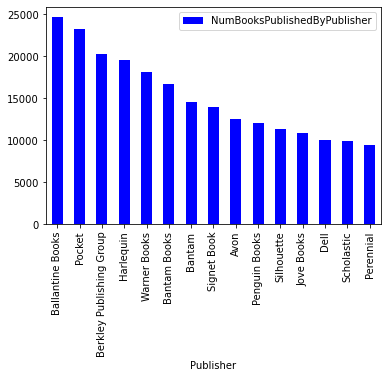

In [179]:
Top15Publishers.plot.bar(x='Publisher',y='NumBooksPublishedByPublisher',color='blue').get_figure().savefig('Top15Publishers.png')

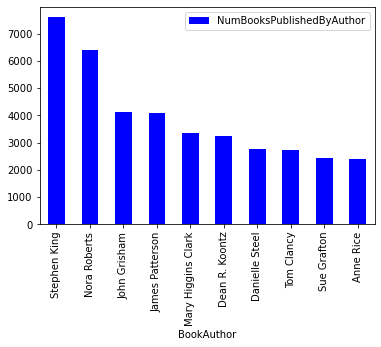

In [181]:

fig = Top10Authors.plot.bar(x='BookAuthor',y='NumBooksPublishedByAuthor',color='blue').get_figure()
fig.savefig('Top10Authors.png')

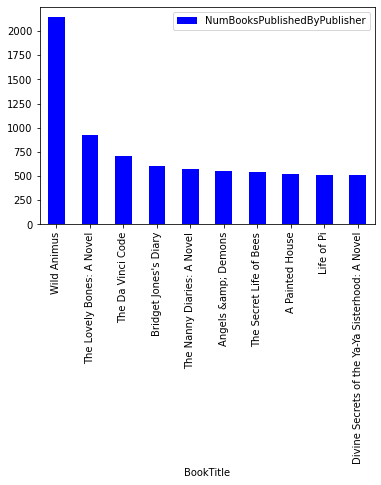

In [183]:
fig = Top10BooksByMostPublishers.plot.bar(x='BookTitle',y='NumBooksPublishedByPublisher',color='blue').get_figure()
fig.savefig('Top10BooksByMostPublishers.png')

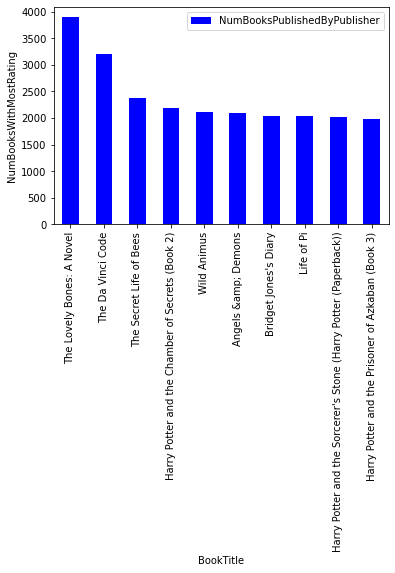

In [184]:
Top10BooksByMostRating['NumBooksPublishedByPublisher'] = Top10BooksByMostRating['NumBooksPublishedByPublisher'].astype(int)
fig = Top10BooksByMostRating.plot.bar(x='BookTitle',y='NumBooksPublishedByPublisher',color='blue')
fig.set_ylabel("NumBooksWithMostRating")
fig.get_figure().savefig('Top10BooksByMostRating.png')

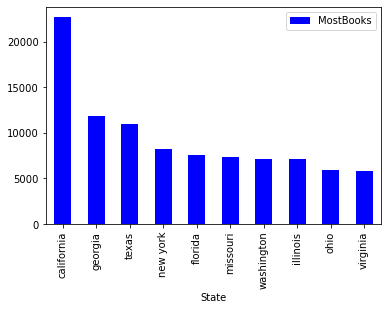

In [185]:
fig = Top10BooksByRegionsInUSA.plot.bar(x='State',y='MostBooks',color='blue').get_figure()
fig.savefig('Top10BooksByRegionsInUSA.png')

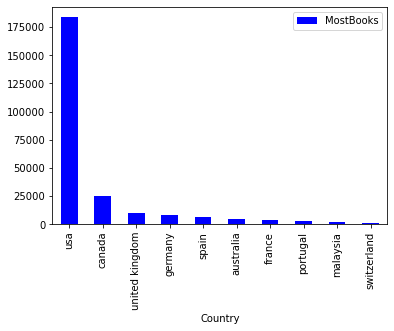

In [186]:
fig = Top10CountriesByMostBooksWithRatings.plot.bar(x='Country',y='MostBooks',color='blue').get_figure()
fig.savefig('Top10CountriesByMostBooksWithRatings.png')

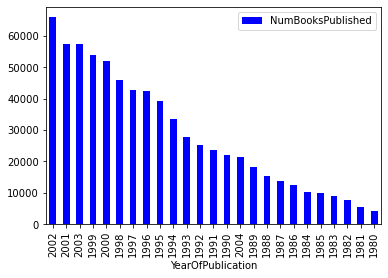

In [187]:
fig = Top25YearsMostBooksPublished.plot.bar(x='YearOfPublication',y='NumBooksPublished',color='blue').get_figure()
fig.savefig('Top25YearsMostBooksPublished.png')